# Discovering Customer behaviour using Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# laod the data
df = pd.read_excel(r"D:\AI\data\datasets-1\Wholesale customers data.xlsx")
df.shape

(440, 8)

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# check for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
# check for duplicated
df.duplicated().sum()

0

In [7]:
# check for outliers
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

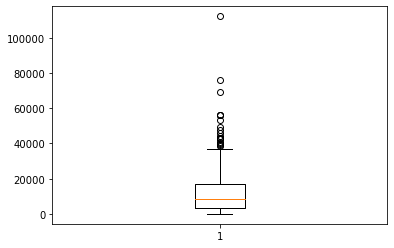

In [8]:
plt.boxplot(df.Fresh)
plt.show()

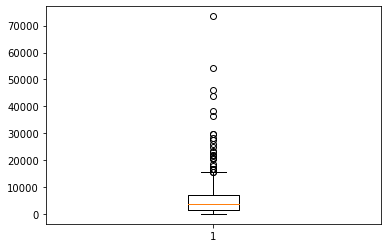

In [9]:
plt.boxplot(df.Milk)
plt.show()

In [12]:
df.Fresh[df.Fresh>45000] = 45000
df.Milk[df.Milk>25000] = 22000

In [13]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                1.352287
Milk                 1.885618
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [14]:
df2 = df[['Fresh','Milk']]

### Preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2 = pd.DataFrame(sc.fit_transform(df2),columns=['Fresh','Milk'])
df2.head()

,Fresh,Milk
0,0.096954,0.765980
1,-0.417574,0.793926
2,-0.482120,0.612093
3,0.151597,-0.769255
4,1.008839,-0.004541


## Apply clustering

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=3)
model.fit(df2)

KMeans(n_clusters=3, random_state=3)

In [18]:
# analyse cluster centers
pd.DataFrame(model.cluster_centers_,columns=['Fresh','Milk'])

,Fresh,Milk
0,-0.506691,-0.308887
1,1.318746,-0.284983
2,-0.096580,2.159278


In [19]:
df2['cluster'] = model.labels_
df2.head(10)

,Fresh,Milk,cluster
0,0.096954,0.765980,0
1,-0.417574,0.793926,0
2,-0.482120,0.612093,0
3,0.151597,-0.769255,0
4,1.008839,-0.004541,1
5,-0.201568,0.512466,0
6,0.047170,-0.405771,0
7,-0.369716,-0.086929,0
8,-0.517876,-0.324291,0
9,-0.513934,1.026752,2


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


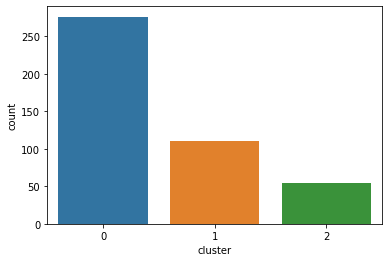

In [20]:
sns.countplot(df2.cluster)
plt.show()